# Sustainability Agricultural Analysis

## Background: 
Purpose of this case-study is to identify the important markets across the Globe, that has a high agricultural participation and produces most of the cereal in the world. Based on the World Bank Data, we have generated the country specific production metrics in terms of the Data Features that exists in #Data Description
## Objective: 
To extract actionable insights that will enable Business growth in terms of Fertilizer Production & Optimization

## Key Questions:
1. What are the different features that affects the Fertilizer usage?
2. Are there any Economic factors that drives the Cereal Production?
3. Trend analysis of the countries having high Agricultural usage and Cereal Production

## Data Description:

## Data:

**Fertilizer consumption (% of fertilizer production)** 

**Fertilizer consumption (kilograms per hectare of arable land)**

**Agricultural land (% of land area**

**Arable land (hectares per person)**

**Agricultural irrigated land (% of total agricultural land)**

**Average precipitation in depth (mm per year)**

**Cereal production (metric tons)**

**Cereal yield (kg per hectare)**

**Access to electricity, rural (% of rural population)**

**Agricultural nitrous oxide emissions (% of total)**

**Agriculture, forestry, and fishing, value added (% of GDP)**

**Employment in agriculture (% of total employment) (modeled ILO estimate)**

**Agriculture, forestry, and fishing, value added (current US$)**

### Import the necessary libraries - pandas, numpy, seaborn, matplotlib.pyplot

In [1]:
# Library to suppress warnings or deprecation notes 
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Libraries to help with data visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Load the dataset

In [3]:
data = pd.read_csv('agri_data.csv')

In [4]:
data.columns

Index(['Country Name', 'Date',
       'Agriculture, forestry, and fishing, value added (current US$)',
       'Agriculture, forestry, and fishing, value added (% of GDP)',
       'Arable land (hectares per person)',
       'Agricultural land (% of land area)',
       'Agricultural nitrous oxide emissions (% of total)',
       'Fertilizer consumption (kilograms per hectare of arable land)',
       'Fertilizer consumption (% of fertilizer production)',
       'Agricultural irrigated land (% of total agricultural land)',
       'Cereal yield (kg per hectare)',
       'Access to electricity, rural (% of rural population)',
       'Employment in agriculture (% of total employment) (modeled ILO estimate)',
       'Cereal production (metric tons)',
       'Average precipitation in depth (mm per year)'],
      dtype='object')

In [5]:
# copying data to another varaible to avoid any changes to original data
df = data.copy()

### View the first few rows of the dataset

In [6]:
# looking at head (5 observations) 
df.head()

,Country Name,Date,"Agriculture, forestry, and fishing, value added (current US$)","Agriculture, forestry, and fishing, value added (% of GDP)",Arable land (hectares per person),Agricultural land (% of land area),Agricultural nitrous oxide emissions (% of total),Fertilizer consumption (kilograms per hectare of arable land),Fertilizer consumption (% of fertilizer production),Agricultural irrigated land (% of total agricultural land),Cereal yield (kg per hectare),"Access to electricity, rural (% of rural population)",Employment in agriculture (% of total employment) (modeled ILO estimate),Cereal production (metric tons),Average precipitation in depth (mm per year)
0,Aruba,2010,NaN,NaN,0.019672,11.111111,NaN,NaN,NaN,NaN,NaN,100.000000,NaN,NaN,NaN
1,Africa Eastern and Southern,2010,9.196553e+10,10.852549,0.183742,43.799190,NaN,20.799731,252.487265,NaN,1818.838430,16.241064,63.487422,69536398.0,NaN
2,Afghanistan,2010,4.156046e+09,26.210069,0.267016,58.069111,NaN,1.777860,115.245883,5.001187,2011.100000,30.218800,54.580002,5957000.0,NaN
3,Africa Western and Central,2010,1.341241e+11,22.672069,0.273868,39.265777,NaN,10.196945,1753.283752,NaN,1186.055616,20.552615,49.486806,60610772.0,NaN
4,Angola,2010,5.179055e+09,6.180293,0.175542,42.120799,NaN,8.430000,NaN,NaN,629.300000,NaN,48.880001,1181944.0,NaN


In [7]:
df.columns

Index(['Country Name', 'Date',
       'Agriculture, forestry, and fishing, value added (current US$)',
       'Agriculture, forestry, and fishing, value added (% of GDP)',
       'Arable land (hectares per person)',
       'Agricultural land (% of land area)',
       'Agricultural nitrous oxide emissions (% of total)',
       'Fertilizer consumption (kilograms per hectare of arable land)',
       'Fertilizer consumption (% of fertilizer production)',
       'Agricultural irrigated land (% of total agricultural land)',
       'Cereal yield (kg per hectare)',
       'Access to electricity, rural (% of rural population)',
       'Employment in agriculture (% of total employment) (modeled ILO estimate)',
       'Cereal production (metric tons)',
       'Average precipitation in depth (mm per year)'],
      dtype='object')

### Check the shape of the dataset

In [8]:
df.shape

(2394, 15)

* The dataset has 29,101 rows and 13 columns.

### Check the info()

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2394 entries, 0 to 2393
Data columns (total 15 columns):
 #   Column                                                                    Non-Null Count  Dtype  
---  ------                                                                    --------------  -----  
 0   Country Name                                                              2394 non-null   object 
 1   Date                                                                      2394 non-null   int64  
 2   Agriculture, forestry, and fishing, value added (current US$)             2170 non-null   float64
 3   Agriculture, forestry, and fishing, value added (% of GDP)                2171 non-null   float64
 4   Arable land (hectares per person)                                         2289 non-null   float64
 5   Agricultural land (% of land area)                                        2318 non-null   float64
 6   Agricultural nitrous oxide emissions (% of total)               

**Observations**
* Total observations are 2394
* Most columns have a missing value. NO2 emissions have 0 value, so dropping it for this analysis
* For now, replace the missing value with 0.0, we can think of KNN Imputer as an alternative

# Data Preprocessing

### Fixing the datatypes

In [10]:
df.drop(columns=['Agricultural nitrous oxide emissions (% of total)'], inplace=True)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2394 entries, 0 to 2393
Data columns (total 14 columns):
 #   Column                                                                    Non-Null Count  Dtype  
---  ------                                                                    --------------  -----  
 0   Country Name                                                              2394 non-null   object 
 1   Date                                                                      2394 non-null   int64  
 2   Agriculture, forestry, and fishing, value added (current US$)             2170 non-null   float64
 3   Agriculture, forestry, and fishing, value added (% of GDP)                2171 non-null   float64
 4   Arable land (hectares per person)                                         2289 non-null   float64
 5   Agricultural land (% of land area)                                        2318 non-null   float64
 6   Fertilizer consumption (kilograms per hectare of arable land)   

### Summary of the data

In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Date,2394.0,2.014000e+03,2.582528e+00,2010.000000,2.012000e+03,2.014000e+03,2.016000e+03,2.018000e+03
"Agriculture, forestry, and fishing, value added (current US$)",2170.0,1.339348e+11,4.121692e+11,200049.854660,8.519299e+08,4.104821e+09,3.510667e+10,3.388019e+12
"Agriculture, forestry, and fishing, value added (% of GDP)",2171.0,1.057050e+01,1.020297e+01,0.013624,2.425020e+00,7.302995e+00,1.651827e+01,6.061109e+01
Arable land (hectares per person),2289.0,1.980260e-01,2.108021e-01,0.000099,6.988585e-02,1.498421e-01,2.452342e-01,1.762411e+00
Agricultural land (% of land area),2318.0,3.725911e+01,2.020241e+01,0.469231,2.238854e+01,3.766647e+01,4.871968e+01,8.299623e+01
Fertilizer consumption (kilograms per hectare of arable land),1879.0,1.760593e+02,3.712092e+02,0.000000,2.522715e+01,1.011529e+02,1.784177e+02,5.618460e+03
Fertilizer consumption (% of fertilizer production),1117.0,4.315667e+02,2.583155e+03,0.033651,3.606998e+01,1.038581e+02,2.306677e+02,4.962057e+04
Agricultural irrigated land (% of total agricultural land),457.0,1.169939e+01,1.527119e+01,0.001350,1.087120e+00,5.771967e+00,1.641791e+01,7.586207e+01
Cereal yield (kg per hectare),2051.0,3.411362e+03,2.951550e+03,34.300000,1.609989e+03,2.970000e+03,4.387450e+03,3.676190e+04
"Access to electricity, rural (% of rural population)",2297.0,7.705836e+01,3.271123e+01,0.522863,5.927685e+01,9.806508e+01,1.000000e+02,1.000000e+02


In [13]:
df['Fertilizer consumption (kilograms per hectare of arable land)'].describe().T

count    1879.000000
mean      176.059305
std       371.209236
min         0.000000
25%        25.227148
50%       101.152896
75%       178.417708
max      5618.460317
Name: Fertilizer consumption (kilograms per hectare of arable land), dtype: float64

## Data Pre-processing

**Let's check the count of each unique category in each of the categorical variables.**

In [14]:
df['Date'] = df.Date.astype('category')

In [15]:
#Making a list of all catrgorical variables 
cat_col=['Country Name', 'Date']

#Printing number of count of each unique value in each column
for column in cat_col:
    print(df[column].value_counts())
    print('-'*50)

Aruba                   9
Oman                    9
Malawi                  9
Malaysia                9
North America           9
                       ..
Guyana                  9
High income             9
Hong Kong SAR, China    9
Honduras                9
Zimbabwe                9
Name: Country Name, Length: 266, dtype: int64
--------------------------------------------------
2010    266
2011    266
2012    266
2013    266
2014    266
2015    266
2016    266
2017    266
2018    266
Name: Date, dtype: int64
--------------------------------------------------


* All the categories in the country variable have an equal count

### Missing value analysis

In [16]:
# checking missing values
df.isna().sum()

Country Name                                                                   0
Date                                                                           0
Agriculture, forestry, and fishing, value added (current US$)                224
Agriculture, forestry, and fishing, value added (% of GDP)                   223
Arable land (hectares per person)                                            105
Agricultural land (% of land area)                                            76
Fertilizer consumption (kilograms per hectare of arable land)                515
Fertilizer consumption (% of fertilizer production)                         1277
Agricultural irrigated land (% of total agricultural land)                  1937
Cereal yield (kg per hectare)                                                343
Access to electricity, rural (% of rural population)                          97
Employment in agriculture (% of total employment) (modeled ILO estimate)     279
Cereal production (metric to

* The variable 'Agricultural irrigated land (% of total agricultural land)' has 1937 missing values
* The variable 'Average precipitation in depth (mm per year)' has 2030 missing values. We can think of something like Country Breakdown Precipitation data and populate it here. For now leaving it as is.

# EDA

### Let us explore the numerical variables first

In [17]:
# While doing uni-variate analysis of numerical variables we want to study their central tendency 
# and dispersion.
# Let us write a function that will help us create a boxplot and histogram for any input numerical 
# variable.
# This function takes the numerical column as the input and returns the boxplots 
# and histograms for the variable.
# Let us see if this helps us write faster and cleaner code.
def histogram_boxplot(feature, figsize=(15,10), bins = None):
    """ Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, # Number of rows of the subplot grid= 2
                                           sharex = True, # x-axis will be shared among all subplots
                                           gridspec_kw = {"height_ratios": (.25, .75)}, 
                                           figsize = figsize 
                                           ) # creating the 2 subplots
    sns.boxplot(feature, ax=ax_box2, showmeans=True, color='red') # boxplot will be created and a star will indicate the mean value of the column
    sns.distplot(feature, kde=F, ax=ax_hist2, bins=bins) if bins else sns.distplot(feature, kde=False, ax=ax_hist2) # For histogram
    ax_hist2.axvline(np.mean(feature), color='g', linestyle='--') # Add mean to the histogram
    ax_hist2.axvline(np.median(feature), color='black', linestyle='-') # Add median to the histogram
    

## Observations on Fertilizer consumption (kilograms per hectare of arable land)

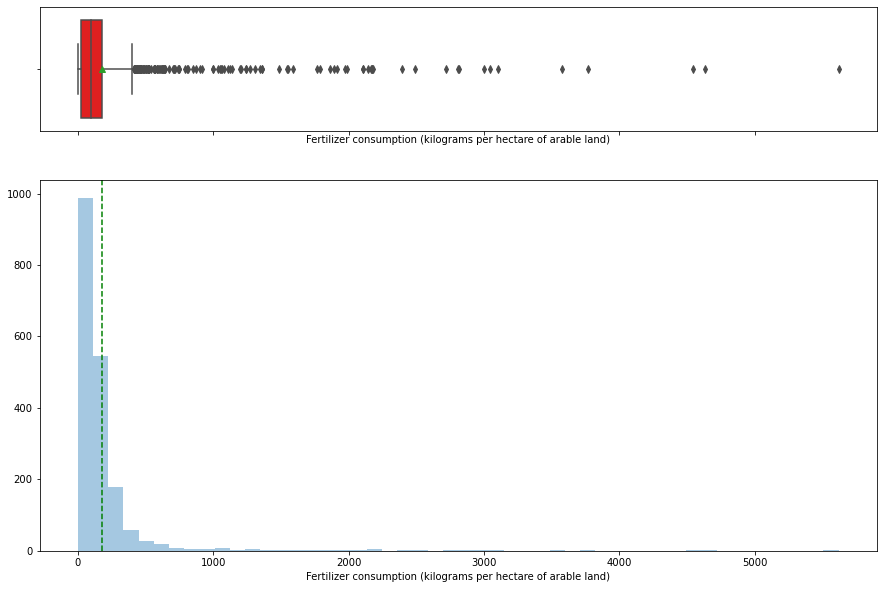

In [18]:
histogram_boxplot(df['Fertilizer consumption (kilograms per hectare of arable land)'])

**Observations**
* The distribution of Fertilizer Consumption(kg per hectare of arable land) is highly right skewed
* Majority of the consumption is between 0-200
* There are a lot of outliers in this variable. 
* While most Fertilizer Consumption(kg per hectare of arable land) are at lower end, we have observations where Fertilizer Consumption(kg per hectare of arable land) went as high as 5000

##  Observations on Fertilizer consumption (% of fertilizer production)

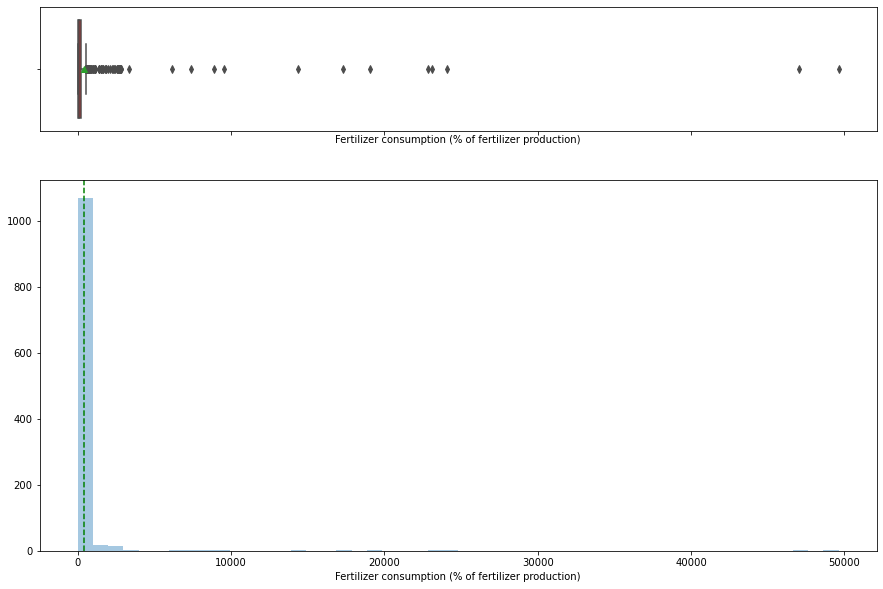

In [19]:
histogram_boxplot(df['Fertilizer consumption (% of fertilizer production)'])

**Observations**
* Fertilizer consumption (% of fertilizer production) is heavily right-skewed
* Most values are concentrated around 100-200.
* There are, however, outliers towards the right, indicating that Fertilizer consumption (% of fertilizer production) is extremely high for few countries

## Observations on Agricultural land (% of land area)

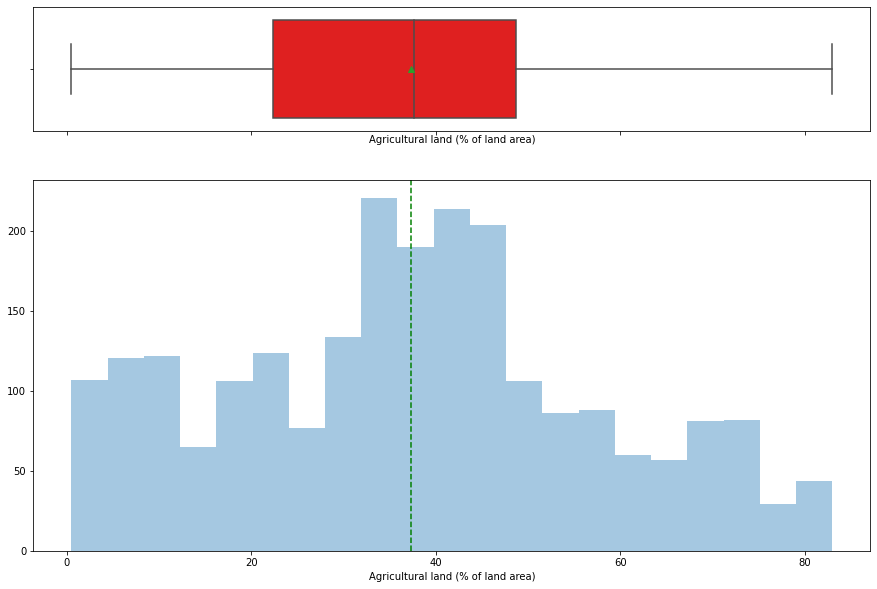

In [20]:
histogram_boxplot(df['Agricultural land (% of land area)'])

**Observations**
* Agricultural land (% of land area) does not have any outliers.
* The distribution of Agricultural land (% of land area) has two peaks (Bi-modal), one at around 35 and other at around 50. The hump is greater at 38

## Observations on Arable land (hectares per person)

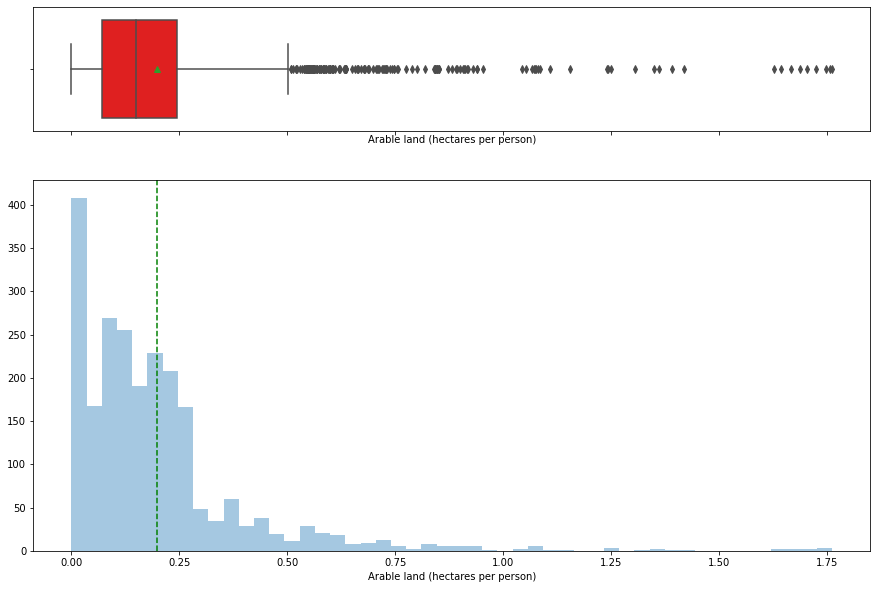

In [21]:
histogram_boxplot(df['Arable land (hectares per person)'])

**Observations**
* Rightly skewed mostly values are concentrated around 0.20
* It has outliers with few countries in the range of 1.75

In [22]:
df.columns

Index(['Country Name', 'Date',
       'Agriculture, forestry, and fishing, value added (current US$)',
       'Agriculture, forestry, and fishing, value added (% of GDP)',
       'Arable land (hectares per person)',
       'Agricultural land (% of land area)',
       'Fertilizer consumption (kilograms per hectare of arable land)',
       'Fertilizer consumption (% of fertilizer production)',
       'Agricultural irrigated land (% of total agricultural land)',
       'Cereal yield (kg per hectare)',
       'Access to electricity, rural (% of rural population)',
       'Employment in agriculture (% of total employment) (modeled ILO estimate)',
       'Cereal production (metric tons)',
       'Average precipitation in depth (mm per year)'],
      dtype='object')

## Observations on Cereal yield (kg per hectare)

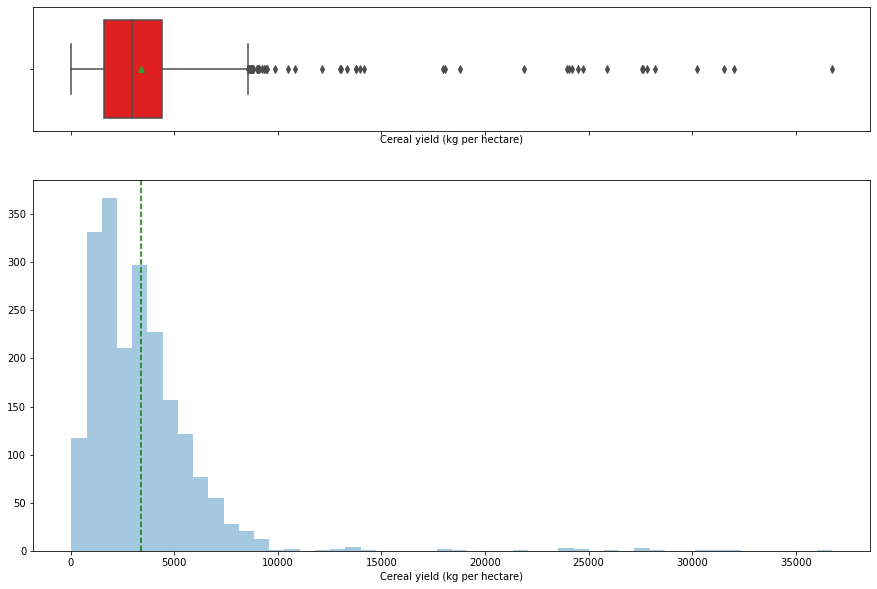

In [23]:
histogram_boxplot(df['Cereal yield (kg per hectare)'])

**Observations**
* Cereal yield (kg per hectare) distribution is again rightly skewed.
* There are few countries with Cereal yield (kg per hectare) as close to 38000

##  Observations on Cereal production (metric tons)

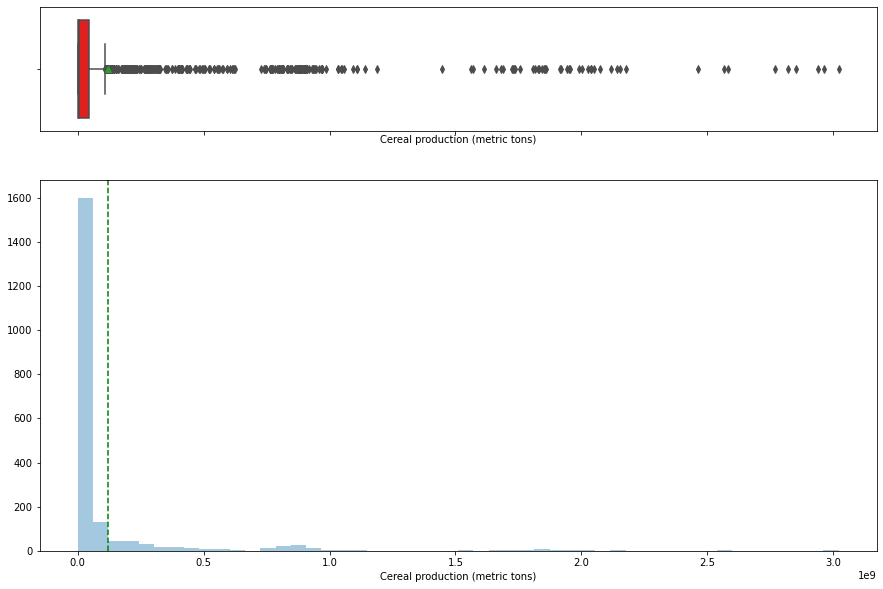

In [24]:
histogram_boxplot(df['Cereal production (metric tons)'])

**Observations**
* Cereal production (metric tons) is again rightly skewed with most companies producing around 0.1-0.2 cereal
* Few countries here produced more than 3.0 metric tonnes Cereal

## Observations on Average precipitation in depth (mm per year)

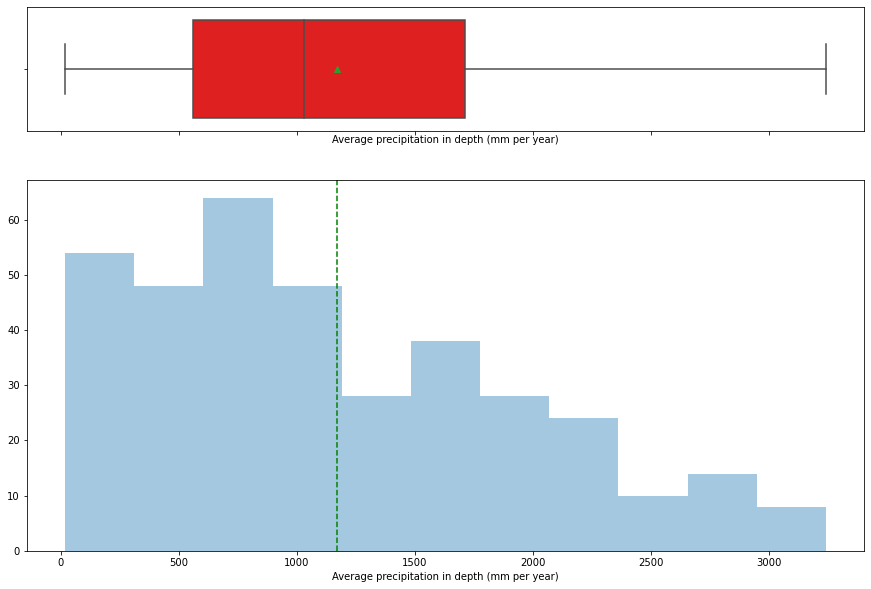

In [25]:
histogram_boxplot(df['Average precipitation in depth (mm per year)'])

**Observations**
* We can observe that there Average precipitation in depth (mm per year) is rightly skewed as well
* There are outliers in this data.
* Few of the countries even have Average precipitation in depth (mm per year) > 3000

## Let's explore the categorical variables now

In [26]:
# Function to create barplots that indicate percentage for each category.
def bar_perc(plot, feature):
    '''
    plot
    feature: 1-d categorical feature array
    '''
    total = len(feature) # length of the column
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total) # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.05 # width of the plot
        y = p.get_y() + p.get_height()           # hieght of the plot
        ax.annotate(percentage, (x, y), size = 12) # annotate the percantage

## Observations on Year

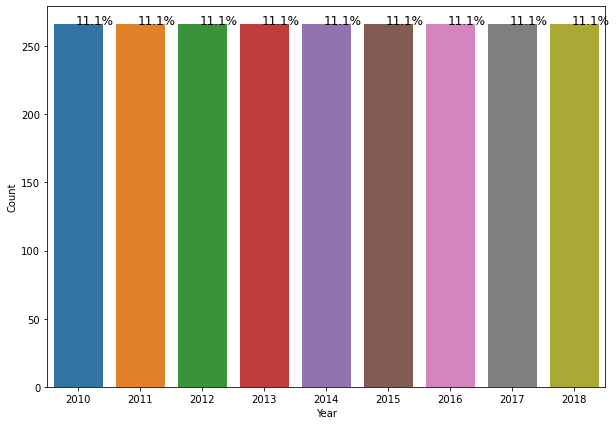

In [27]:
plt.figure(figsize=(10,7))
ax = sns.countplot(df['Date'])
plt.xlabel('Year')
plt.ylabel('Count')
bar_perc(ax,df['Date'])

**Observations**
* Data is uniformly distributed across all the years from 2010-2018

## Observations on Countries

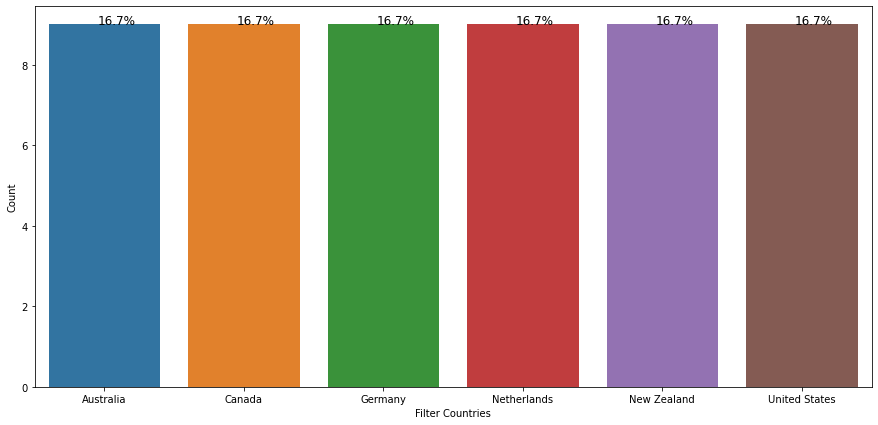

In [28]:
plt.figure(figsize=(15,7))
df_filter = df[df['Country Name'].isin(['Australia', 'New Zealand', 'Canada', 'Netherlands', 'Germany', 'United States'])]
ax = sns.countplot(df_filter['Country Name'])
plt.xlabel('Filter Countries')
plt.ylabel('Count')
bar_perc(ax,df_filter['Country Name'])

* The observations are uniformly distributed across the filtered countries

## Bivariate Analysis

**Plot bivariate charts between variables to understand their interaction with each other.**

## Correlation

In [29]:
df_num = df.select_dtypes(include=np.number)

<AxesSubplot:>

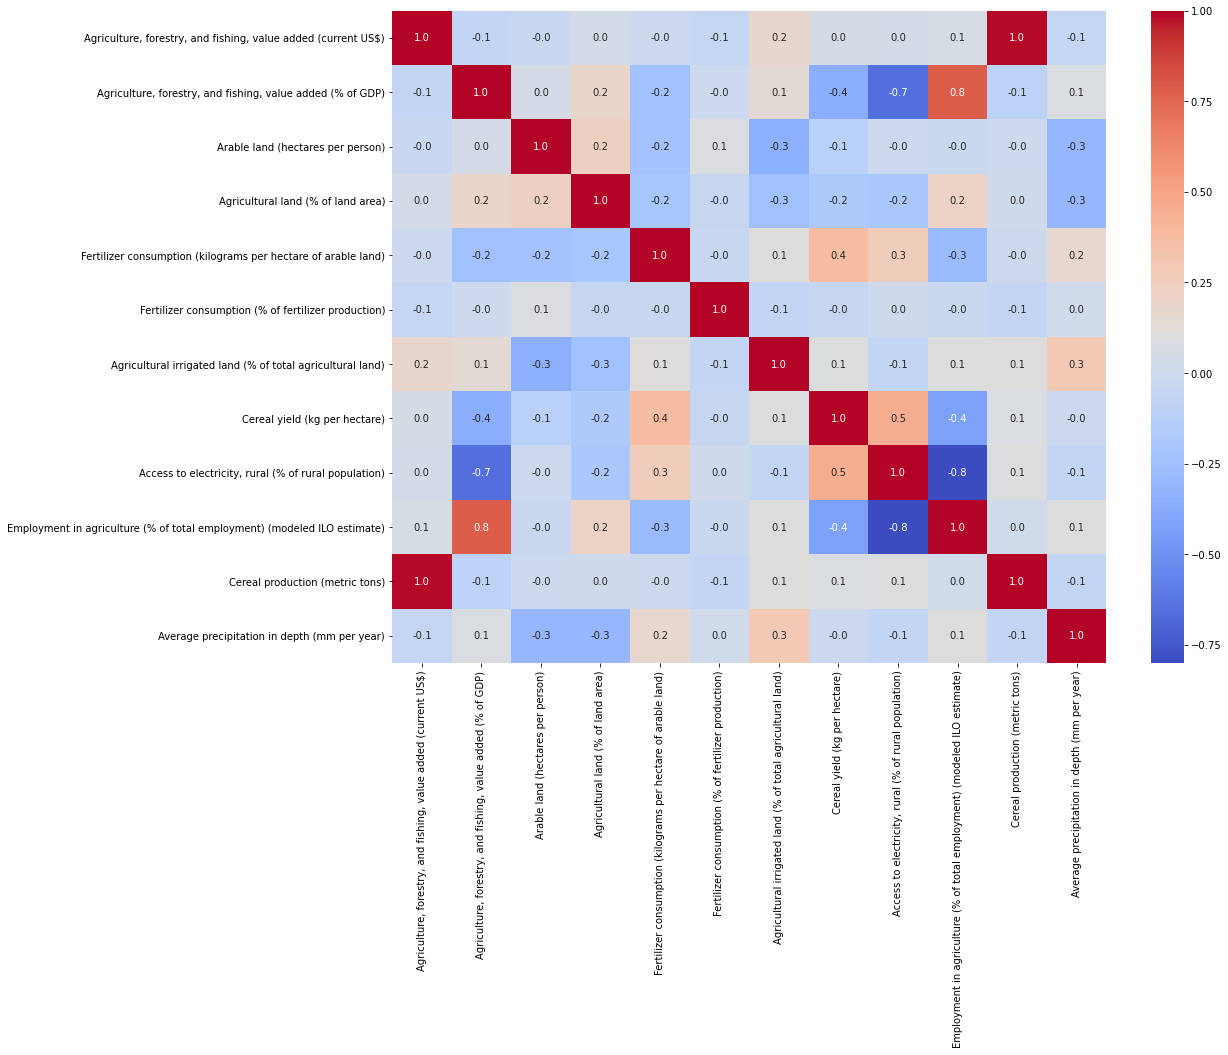

In [30]:
# Check for correlation among numerical variables
num_var = df_num.columns

corr = df[num_var].corr()

# plot the heatmap
plt.figure(figsize=(16,12))
sns.heatmap(corr, annot=True,cmap='coolwarm',
        fmt=".1f",
        xticklabels=corr.columns,
        yticklabels=corr.columns)

**Observations**
* Fertilizer Counsumption (% of fertilizer prod) is not at all related to any agricultural or production features
* Fertilizer consumption (% of fertilizer production) is marginally positively related to Cereal Yield
* Employment in agriculture (% of total employment) (modeled ILO estimate) is highly correlated to Agriculture, forestry, and fishing, value added (% of GDP)
* Employment in agriculture (% of total employment) (modeled ILO estimate) is negatively correlated to Access to electricity, rural (% of rural population)
* Cereal yield (kg per hectare) is marginally negative correlated to Agriculture, forestry, and fishing, value added (% of GDP)
* Cereal yield (kg per hectare) is marginally positively correlated to Access to electricity, rural (% of rural population)

In [31]:
df.columns

Index(['Country Name', 'Date',
       'Agriculture, forestry, and fishing, value added (current US$)',
       'Agriculture, forestry, and fishing, value added (% of GDP)',
       'Arable land (hectares per person)',
       'Agricultural land (% of land area)',
       'Fertilizer consumption (kilograms per hectare of arable land)',
       'Fertilizer consumption (% of fertilizer production)',
       'Agricultural irrigated land (% of total agricultural land)',
       'Cereal yield (kg per hectare)',
       'Access to electricity, rural (% of rural population)',
       'Employment in agriculture (% of total employment) (modeled ILO estimate)',
       'Cereal production (metric tons)',
       'Average precipitation in depth (mm per year)'],
      dtype='object')

### Overall Fertilizer consumption (% of fertilizer production) Trend

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, '2010'),
  Text(1, 0, '2011'),
  Text(2, 0, '2012'),
  Text(3, 0, '2013'),
  Text(4, 0, '2014'),
  Text(5, 0, '2015'),
  Text(6, 0, '2016'),
  Text(7, 0, '2017'),
  Text(8, 0, '2018')])

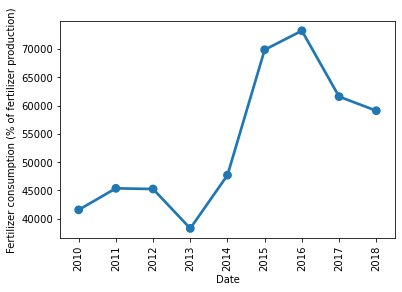

In [32]:
sns.pointplot(x='Date', y='Fertilizer consumption (% of fertilizer production)', data=df, estimator=sum, ci=None)
plt.xticks(rotation=90) # To rotate the x axis labls

### Overall Cereal production (metric tons) Trend

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, '2010'),
  Text(1, 0, '2011'),
  Text(2, 0, '2012'),
  Text(3, 0, '2013'),
  Text(4, 0, '2014'),
  Text(5, 0, '2015'),
  Text(6, 0, '2016'),
  Text(7, 0, '2017'),
  Text(8, 0, '2018')])

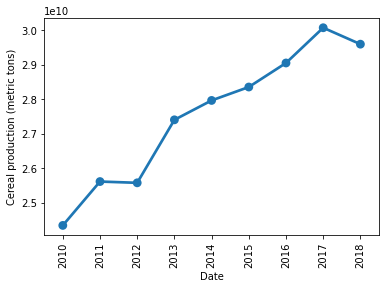

In [33]:
sns.pointplot(x='Date', y='Cereal production (metric tons)', data=df, estimator=sum, ci=None)
plt.xticks(rotation=90) # To rotate the x axis labls

### Overall Cereal yield (kg per hectare)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, '2010'),
  Text(1, 0, '2011'),
  Text(2, 0, '2012'),
  Text(3, 0, '2013'),
  Text(4, 0, '2014'),
  Text(5, 0, '2015'),
  Text(6, 0, '2016'),
  Text(7, 0, '2017'),
  Text(8, 0, '2018')])

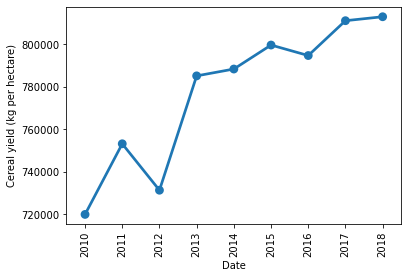

In [34]:
sns.pointplot(x='Date', y='Cereal yield (kg per hectare)', data=df, estimator=sum, ci=None)
plt.xticks(rotation=90) # To rotate the x axis 

### Overall Arable land (hectares per person)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, '2010'),
  Text(1, 0, '2011'),
  Text(2, 0, '2012'),
  Text(3, 0, '2013'),
  Text(4, 0, '2014'),
  Text(5, 0, '2015'),
  Text(6, 0, '2016'),
  Text(7, 0, '2017'),
  Text(8, 0, '2018')])

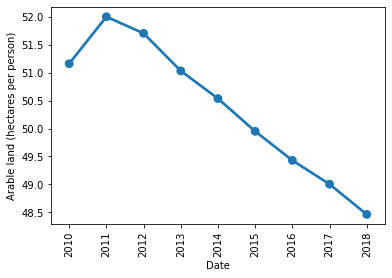

In [35]:
sns.pointplot(x='Date', y='Arable land (hectares per person)', data=df, estimator=sum, ci=None)
plt.xticks(rotation=90) # To rotate the x axis labls

### Overall Agricultural land (% of land area) Trend

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, '2010'),
  Text(1, 0, '2011'),
  Text(2, 0, '2012'),
  Text(3, 0, '2013'),
  Text(4, 0, '2014'),
  Text(5, 0, '2015'),
  Text(6, 0, '2016'),
  Text(7, 0, '2017'),
  Text(8, 0, '2018')])

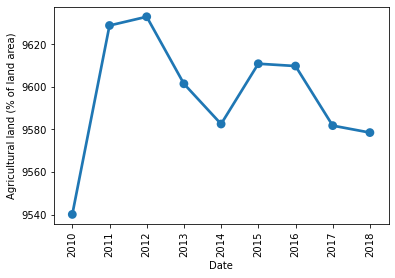

In [36]:
sns.pointplot(x='Date', y='Agricultural land (% of land area)', data=df, estimator=sum, ci=None)
plt.xticks(rotation=90) # To rotate the x ax

### Overall Fertilizer consumption (kg/hectare of arable land)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, '2010'),
  Text(1, 0, '2011'),
  Text(2, 0, '2012'),
  Text(3, 0, '2013'),
  Text(4, 0, '2014'),
  Text(5, 0, '2015'),
  Text(6, 0, '2016'),
  Text(7, 0, '2017'),
  Text(8, 0, '2018')])

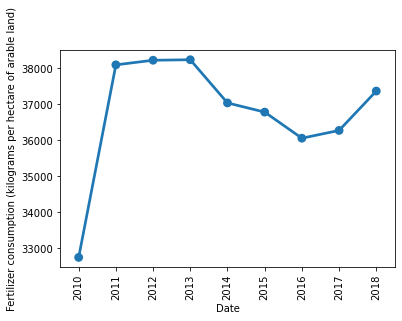

In [37]:
sns.pointplot(x='Date', y='Fertilizer consumption (kilograms per hectare of arable land)', data=df, estimator=sum, ci=None)
plt.xticks(rotation=90)

**Observations**
* The overall fertilizer consumption have been stagnant from 2011-2013 and then reduced till 2016 and then caught up the demand

# Top Countries over the last 9 years for each Feature

In [38]:
df.columns

Index(['Country Name', 'Date',
       'Agriculture, forestry, and fishing, value added (current US$)',
       'Agriculture, forestry, and fishing, value added (% of GDP)',
       'Arable land (hectares per person)',
       'Agricultural land (% of land area)',
       'Fertilizer consumption (kilograms per hectare of arable land)',
       'Fertilizer consumption (% of fertilizer production)',
       'Agricultural irrigated land (% of total agricultural land)',
       'Cereal yield (kg per hectare)',
       'Access to electricity, rural (% of rural population)',
       'Employment in agriculture (% of total employment) (modeled ILO estimate)',
       'Cereal production (metric tons)',
       'Average precipitation in depth (mm per year)'],
      dtype='object')

In [39]:
def get_results_last_9_years(df, col_name):
    res = df_2010_2018.groupby(['Country Name']).aggregate({col_name:sum}).reset_index()
    res = res.sort_values(by = col_name, ascending=False)
    return res

In [40]:
df_2010_2018 = df[df['Date'].isin([2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018])]

In [61]:
def plot_top_countries_last_9_years(df, col_name):
    res = get_results_last_9_years(df_2010_2018, col_name)[0:20]
    plt.figure(figsize = (20,10)) # To resize the plot
    sns.barplot(data = res, x = "Country Name", y = col_name, ci=None, color = "coral",
            order=res.groupby('Country Name')[col_name].mean().sort_values(ascending = False).index)
    plt.xticks(rotation=90) # To rotate the x axis lables
    return res
    

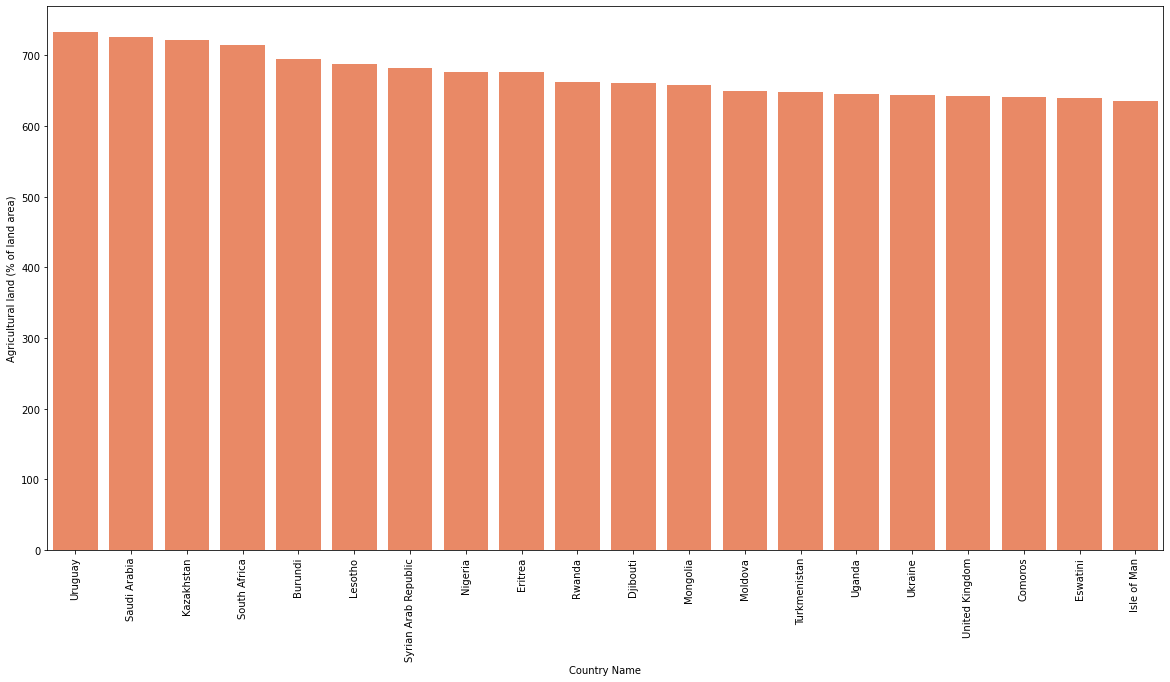

In [63]:
country_top_agri_land = plot_top_countries_last_9_years(df_2010_2018, 'Agricultural land (% of land area)')

**OBSERVATIONS**

Uruguay has the highest mean Agricultural Land over the last 9 years followed by Saudi, Kazahistan, South Africa & Burundi


In [65]:
country_top_agri_land[0:10]

,Country Name,Agricultural land (% of land area)
255,Uruguay,732.877957
207,Saudi Arabia,726.393992
122,Kazakhstan,722.194318
219,South Africa,715.241243
34,Burundi,694.976636
138,Lesotho,687.812912
236,Syrian Arab Republic,682.187006
178,Nigeria,676.605688
70,Eritrea,676.514851
203,Rwanda,662.135792


In [43]:
def get_top_10_trends(df, country_ls, col_name):
    df_top_10 = df[df['Country Name'].isin(country_ls)]
    plt.figure(figsize=(20,10))
    sns.lineplot(x="Date", y=col_name, ci=95, data=df_top_10, hue='Country Name')
    plt.ylabel(col_name)
    plt.xlabel("Year")
    plt.show()
        
        

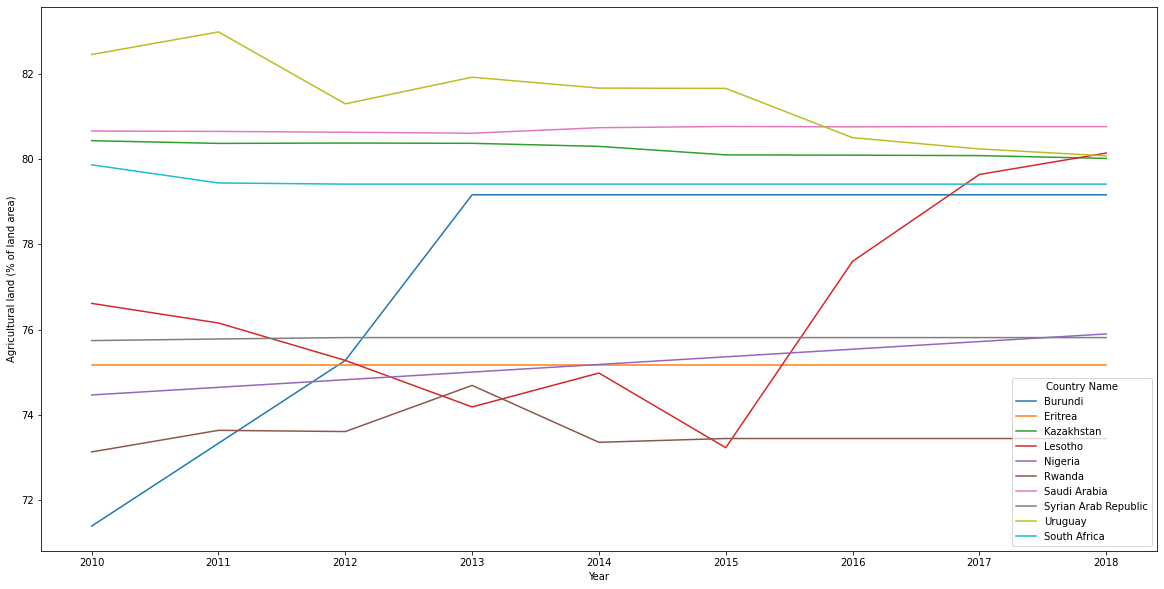

In [67]:
get_top_10_trends(df_2010_2018, country_top_agri_land['Country Name'][0:10].tolist(), \
                  'Agricultural land (% of land area)')

**OBSERVATIONS**
* Lesotho has shown an upward trend after 2015 in terms of Agri Land
* Saudi Arabia has a steady/uniform distribution across Agri Land
* Overall Agri Land is seeing a steep decline in Uruguay

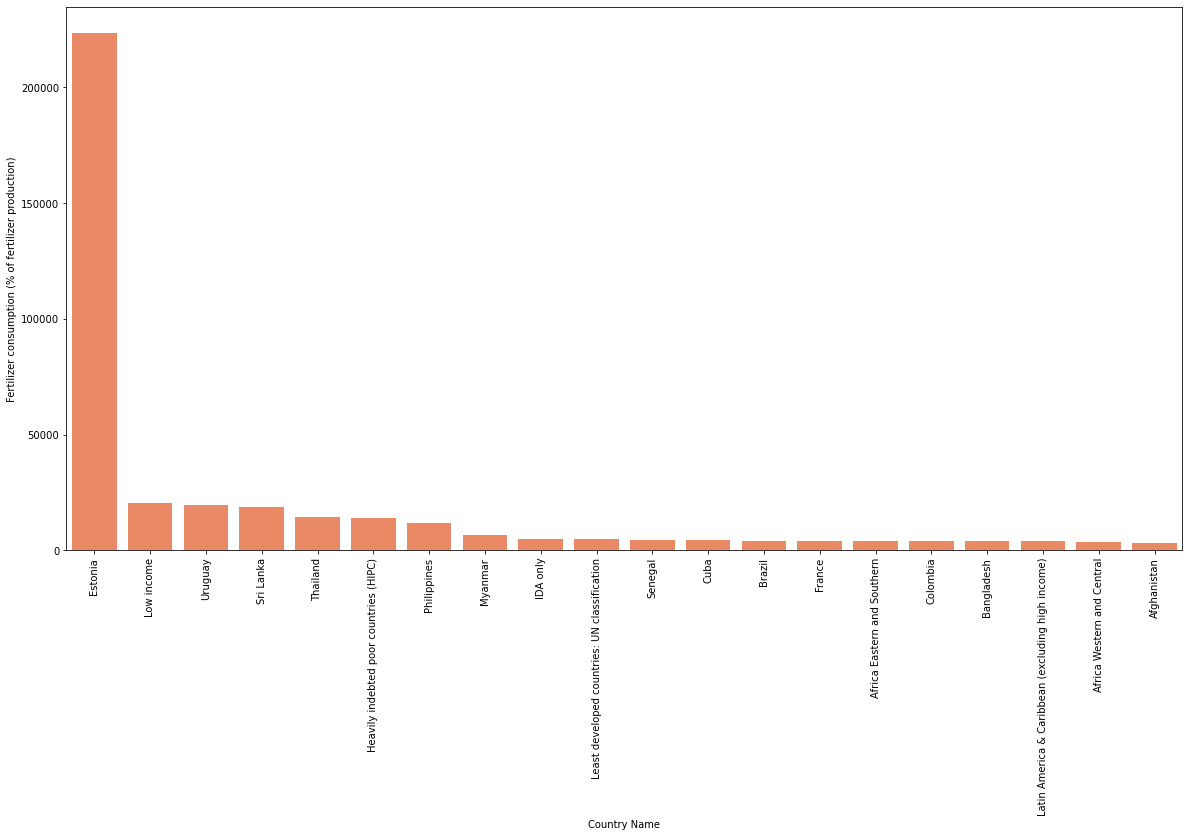

In [68]:
country_top_fert = plot_top_countries_last_9_years(df_2010_2018, 'Fertilizer consumption (% of fertilizer production)')

**OBSERVATIONS**
- Estonia has the Highest Fertilizer Consumption
- Uruguay, Sri Lanka, Thailand & Philippines are among the largest consumer after Estonia



In [71]:
country_ls = country_top_fert['Country Name'][0:10]

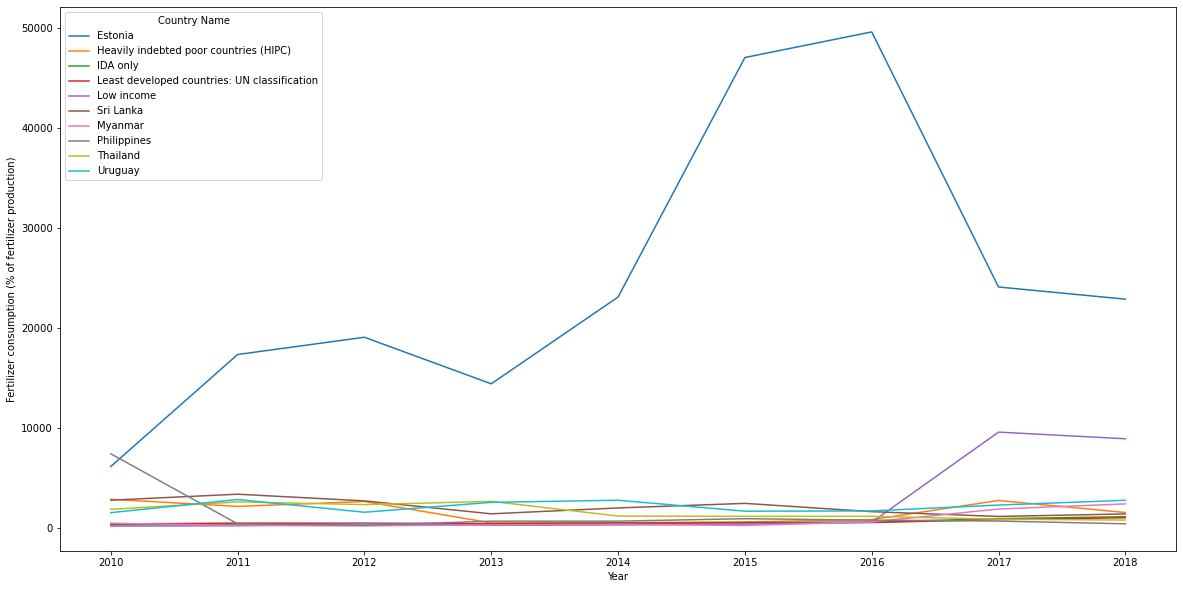

In [72]:
get_top_10_trends(df_2010_2018, country_ls, 'Fertilizer consumption (% of fertilizer production)')

**OBSERVATIONS**
* Estonia follows a cyclic pattern.
* Most of the other countries have a uniform distribution
* Philippines showing a slight higher trend in 2017 and 2018.


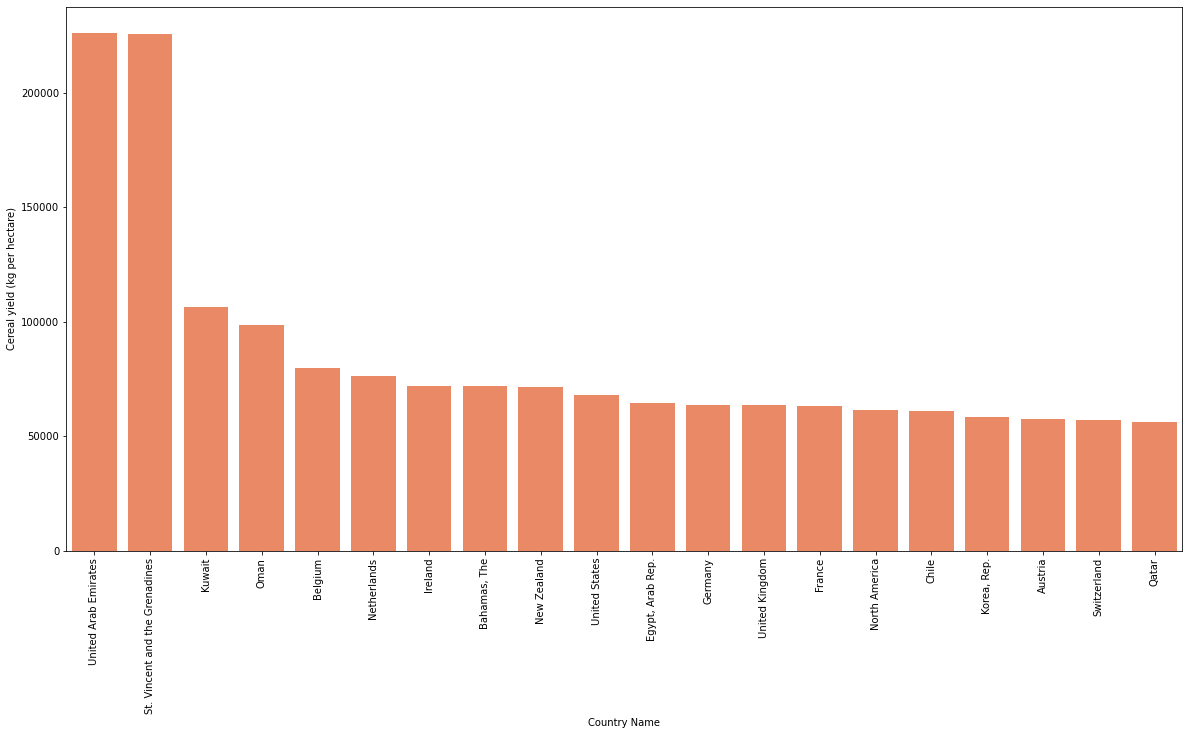

In [73]:
country_top_cereal = plot_top_countries_last_9_years(df_2010_2018, 'Cereal yield (kg per hectare)')

**OBSERVATIONS**
* UAE, Kuwait, Oman, Belgium & Netherlands have the highest Cereal Yield
* Surprisingly NZ despite being one of the lowest population nation, is in top 10 Producers.

In [74]:
country_ls = country_top_cereal['Country Name'][0:10]

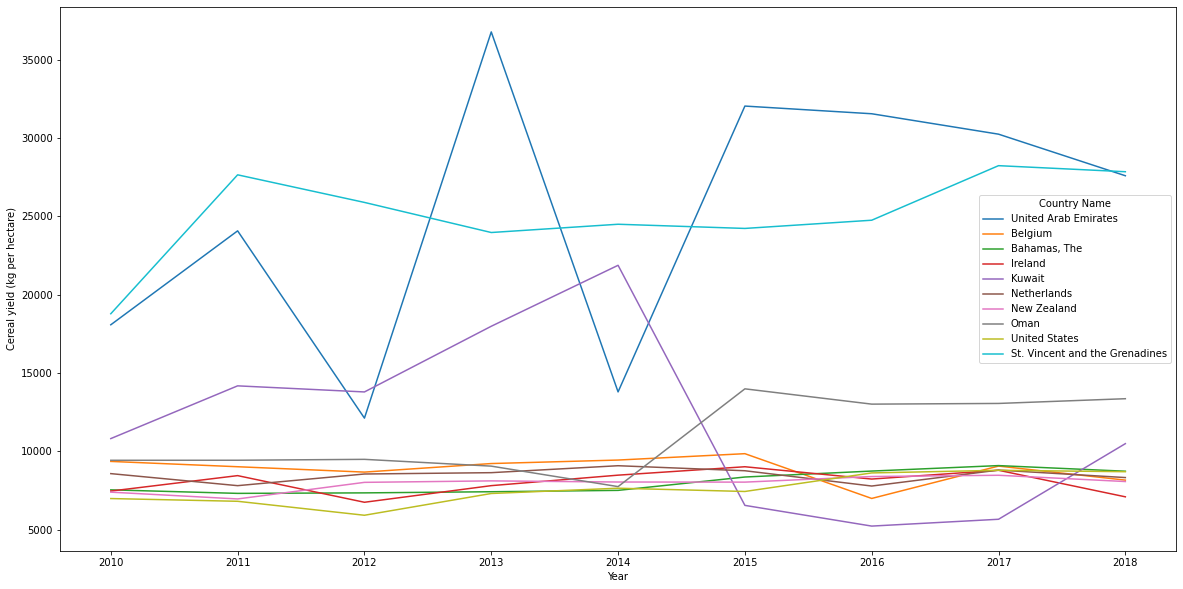

In [75]:
get_top_10_trends(df_2010_2018, country_ls, 'Cereal yield (kg per hectare)')

**OBSERVATIONS**
* UAE is showing a cyclic trend with upward and downward ticks from 2012 to 2013 and 2015 onwards.
* St Vincent anbd the Grenadiens maintains a uniform consistency.
* Kuwait is on the downward trajectory.

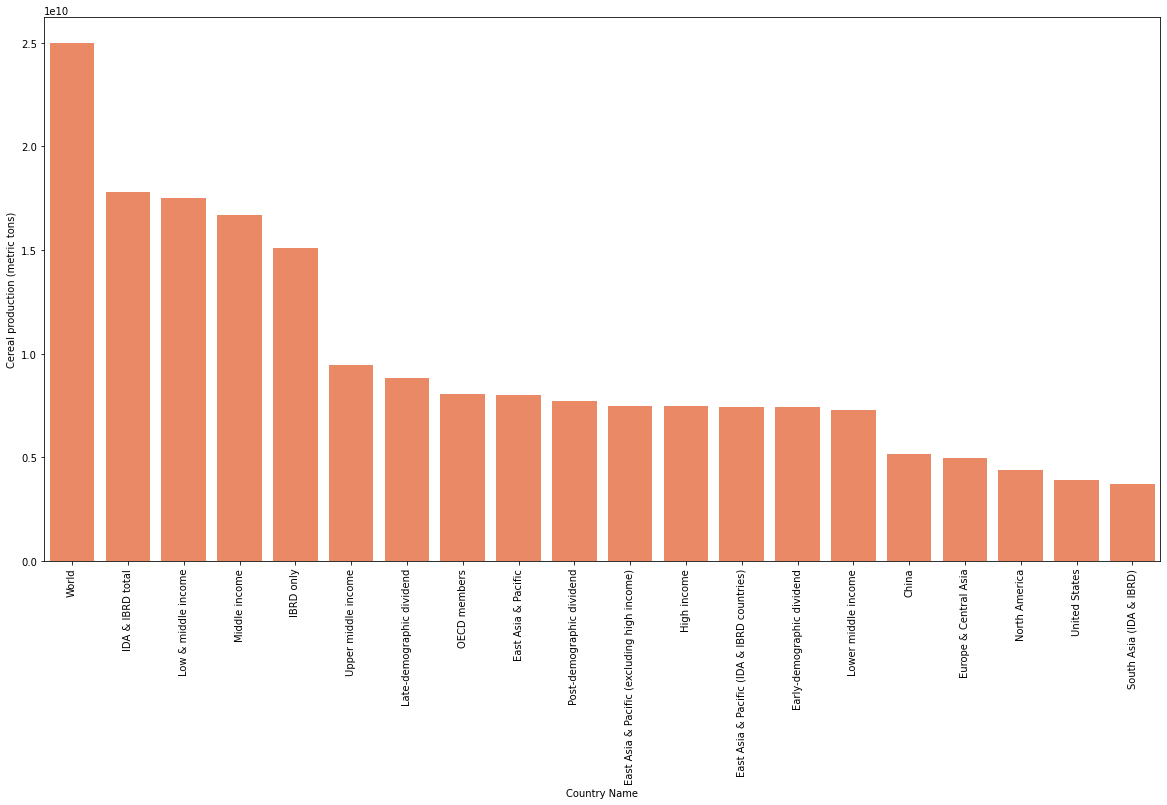

In [76]:
country_top_cereal_prod = plot_top_countries_last_9_years(df_2010_2018, 'Cereal production (metric tons)')

**OBSERVATIONS**

* OECD, East Asia & Pacific, China, Europe & Central Asia shows the largest Cereal Production

In [77]:
country_ls = country_top_cereal_prod['Country Name'][0:20]

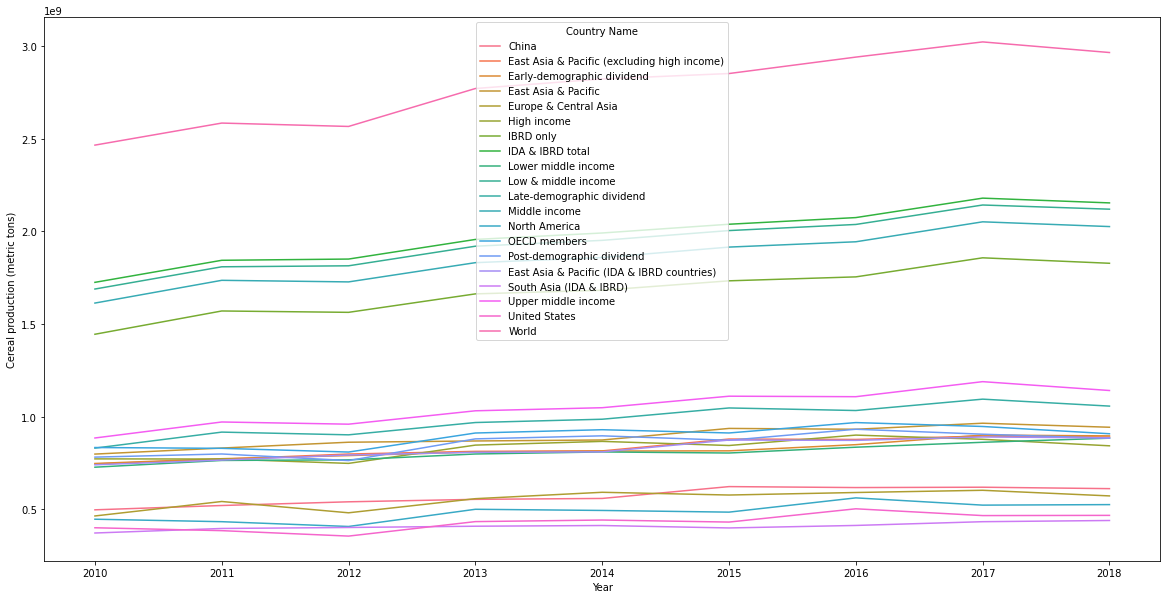

In [78]:
get_top_10_trends(df_2010_2018, country_ls, 'Cereal production (metric tons)')

**OBSERVATIONS**
* All the Regions and countries are showing an Upward Trend in terms of Cereal Prod

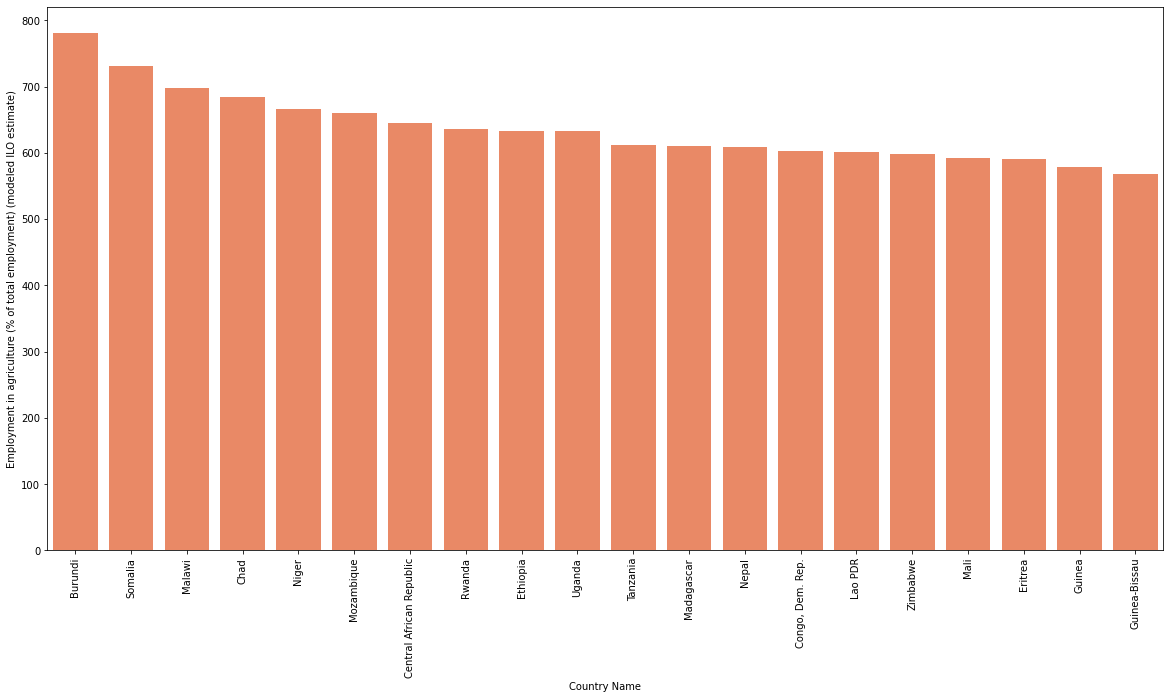

In [79]:
country_top_emp = plot_top_countries_last_9_years(df_2010_2018, 'Employment in agriculture (% of total employment) (modeled ILO estimate)')

**OBSERVATIONS**

- All the African counries lead the Agri Employment
- Burundi, Somalia, Malawi, Chad & Niger are the top 5 Countries

In [82]:
country_ls = country_top_emp['Country Name'][0:10]

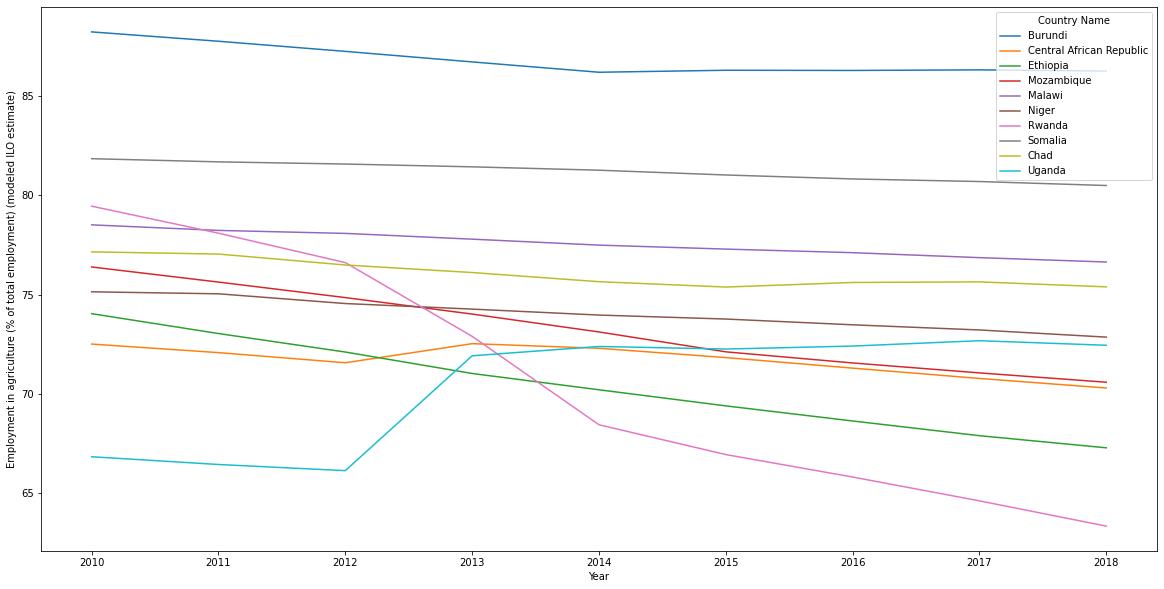

In [83]:
get_top_10_trends(df_2010_2018, country_ls, 'Employment in agriculture (% of total employment) (modeled ILO estimate)')

**OBSERVATIONS**

* Burundi is maintaining a uniform distribution in terms of Agricultural Employment
* Uganda is showing an upward trend since year 2013.
* Rwanda is showing a steep decline since year 2012.

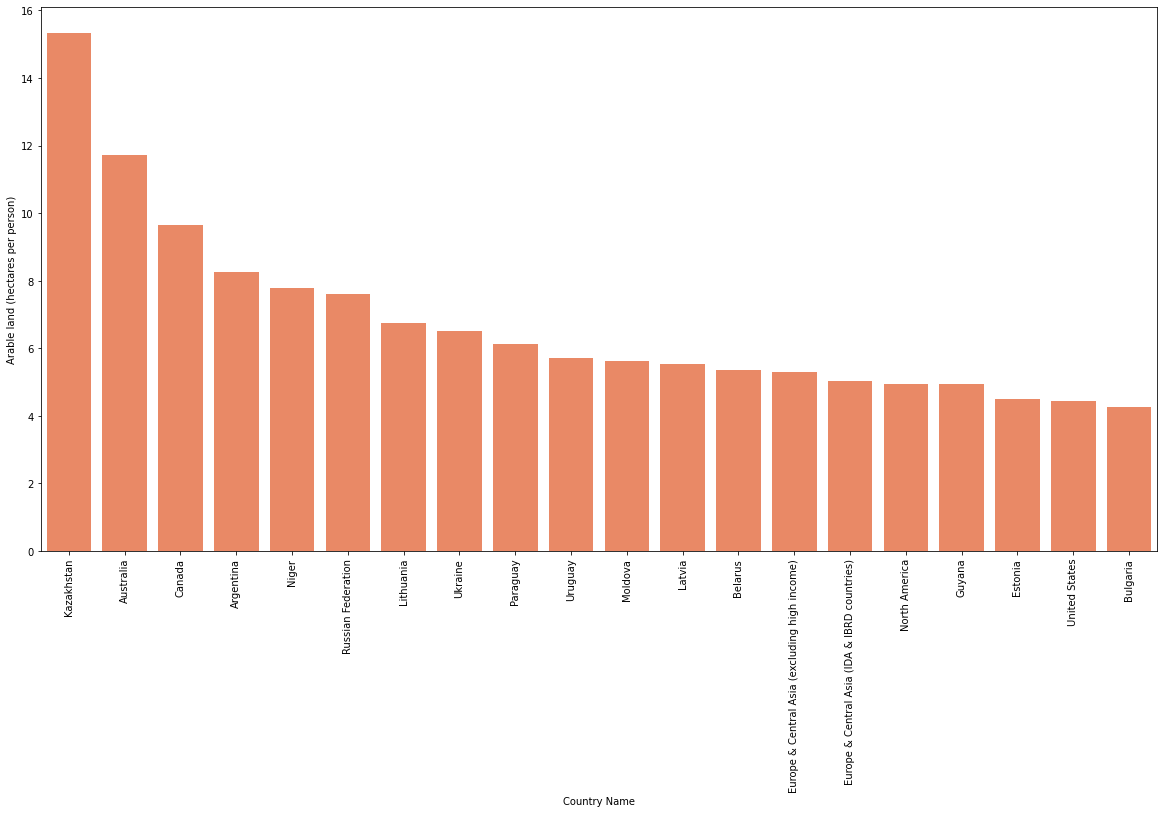

In [84]:
country_top_agrable = plot_top_countries_last_9_years(df_2010_2018, 'Arable land (hectares per person)')

**OBSERVATIONS**

- Kazakhstan, Australia, Canada, Argentina & Niger are the top 5 Agrable Countries
- Russia, Lithuania, Ukraine, Paraguay & Uruguay are the next 5.

In [87]:
country_ls = country_top_agrable['Country Name'][0:10]

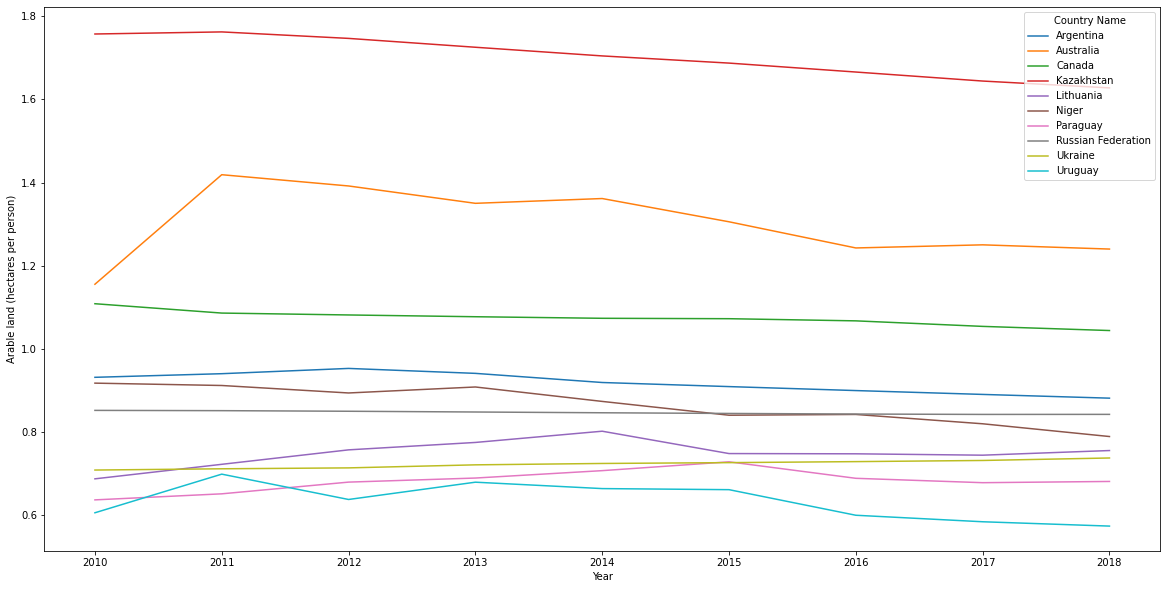

In [88]:
get_top_10_trends(df_2010_2018, country_ls, 'Arable land (hectares per person)')

**OBSERVATIONS**

* Australia, Canada & Argentina are maintaining a uniform Arable land throughout 2010-2018.
* Kazakhstan is steadly seeing a decline in the Arable Land.

# **Conclusion and Recommendations**

## Conclusion

* We analyzed a dataset of nearly 2.4K observations with almost 66 Countries/Region spread around 9 years from 2010-2018

* The features of interest here is the "Fertilizer Consumption", "Cereal Yield", "Agricultural Land" & "Arable Land"  

We are able to conclude that 

1. Fertilizer consumption (% of fertilizer production) has been cyclic with a downward trend in early 2010 and upward trend till 2015 and then declined again.
2. Cereal production (metric tons) have been steadily increasing till 2017 with a marginal decline in 2018
3. Cereal yield (kg per hectare) have seen a healthy growth after 2012 onwards.
4. Agricultural land (% of land area) have been on a downward trajectory.
5. Arable land (hectares per person) have been seeing a steep decline as well.
6. Uruguay has the highest mean Agricultural Land over the last 9 years followed by Saudi, Kazahistan, South Africa & Burundi
7. Estonia has the Highest Fertilizer Consumption followed by Uruguay, Sri Lanka, Thailand & Philippines in the last 9 years.
8. UAE, Kuwait, Oman, Belgium & Netherlands have the highest Cereal Yield.
9. OECD, East Asia & Pacific, China, Europe & Central Asia shows the largest Cereal Production
10. Burundi, Somalia, Malawi, Chad & Niger are the top 5 Countries having the Highest Employment in Agricultural sector.


## Recommendation to business

1. Since "Fertilizer consumption" usage have been sporadic, may be Business should focus on "organic" ways to ensure high "Cereal Yield".
2. "Australia", "Canada", "Argentina" have the largest "Arable Land" which means that they remain one of the most potential market to target from the "agricultural aspect"
3. Asian countries have highest "Cereal Production" but lower "Cereal Yield", that means there is a hidden opportunity to sell off more "Organic Fertilizer"
4. Since African regions and countries have one of the highest "Agricultural Economy", these can again be one of the potential customers.
5. Usage of "Fertilizers" have been declined significantly in "Estonia", may be Business needs to check the pricing structure or keep a close watch on the quality.
6. UAE has the highest Cereal Yield, despite not being the largest "Fertilizer" consumer. May be worth exploring the nature of treatment/application they are utilising.

##  Further Analysis

1. Adding the missing values such as "Precipitation", "Emissions" can further enhance the feature relationship which would be interesting to explore
2. Adding few more data points like "Organic" v/s "Non-Organic" Fertilizer usage, Weather conditions and population count.